# CiFAR-10 Images Classification by Using CNNs

### STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


### STEP 1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape # imgaes, witdth, length, chaneels(ryb)

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

### STEP 2: VISUALIZE DATA

[4]


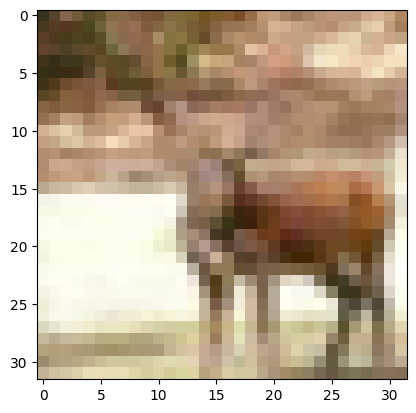

In [7]:
i=1001
plt.imshow(X_train[i])
print(y_train[i]) # will print the class

[7]


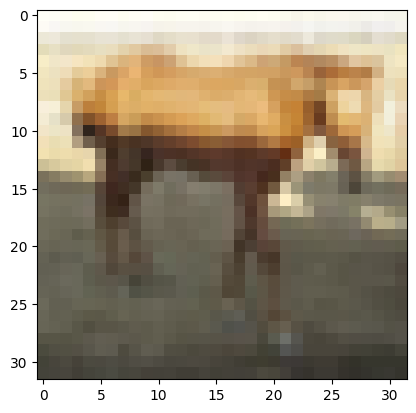

In [8]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

[1]


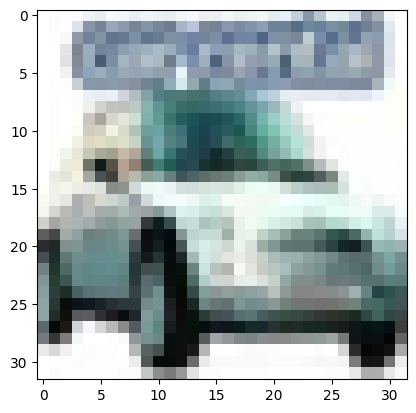

In [9]:
i = 40000
plt.imshow(X_train[i])
print(y_train[i])

[0]


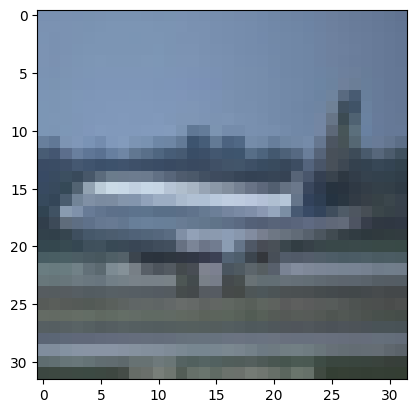

In [10]:
i = 21000
plt.imshow(X_train[i])
print(y_train[i])

[8]


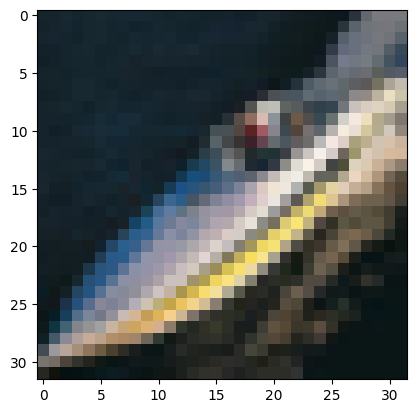

In [11]:
i = 22000
plt.imshow(X_train[i])
print(y_train[i])

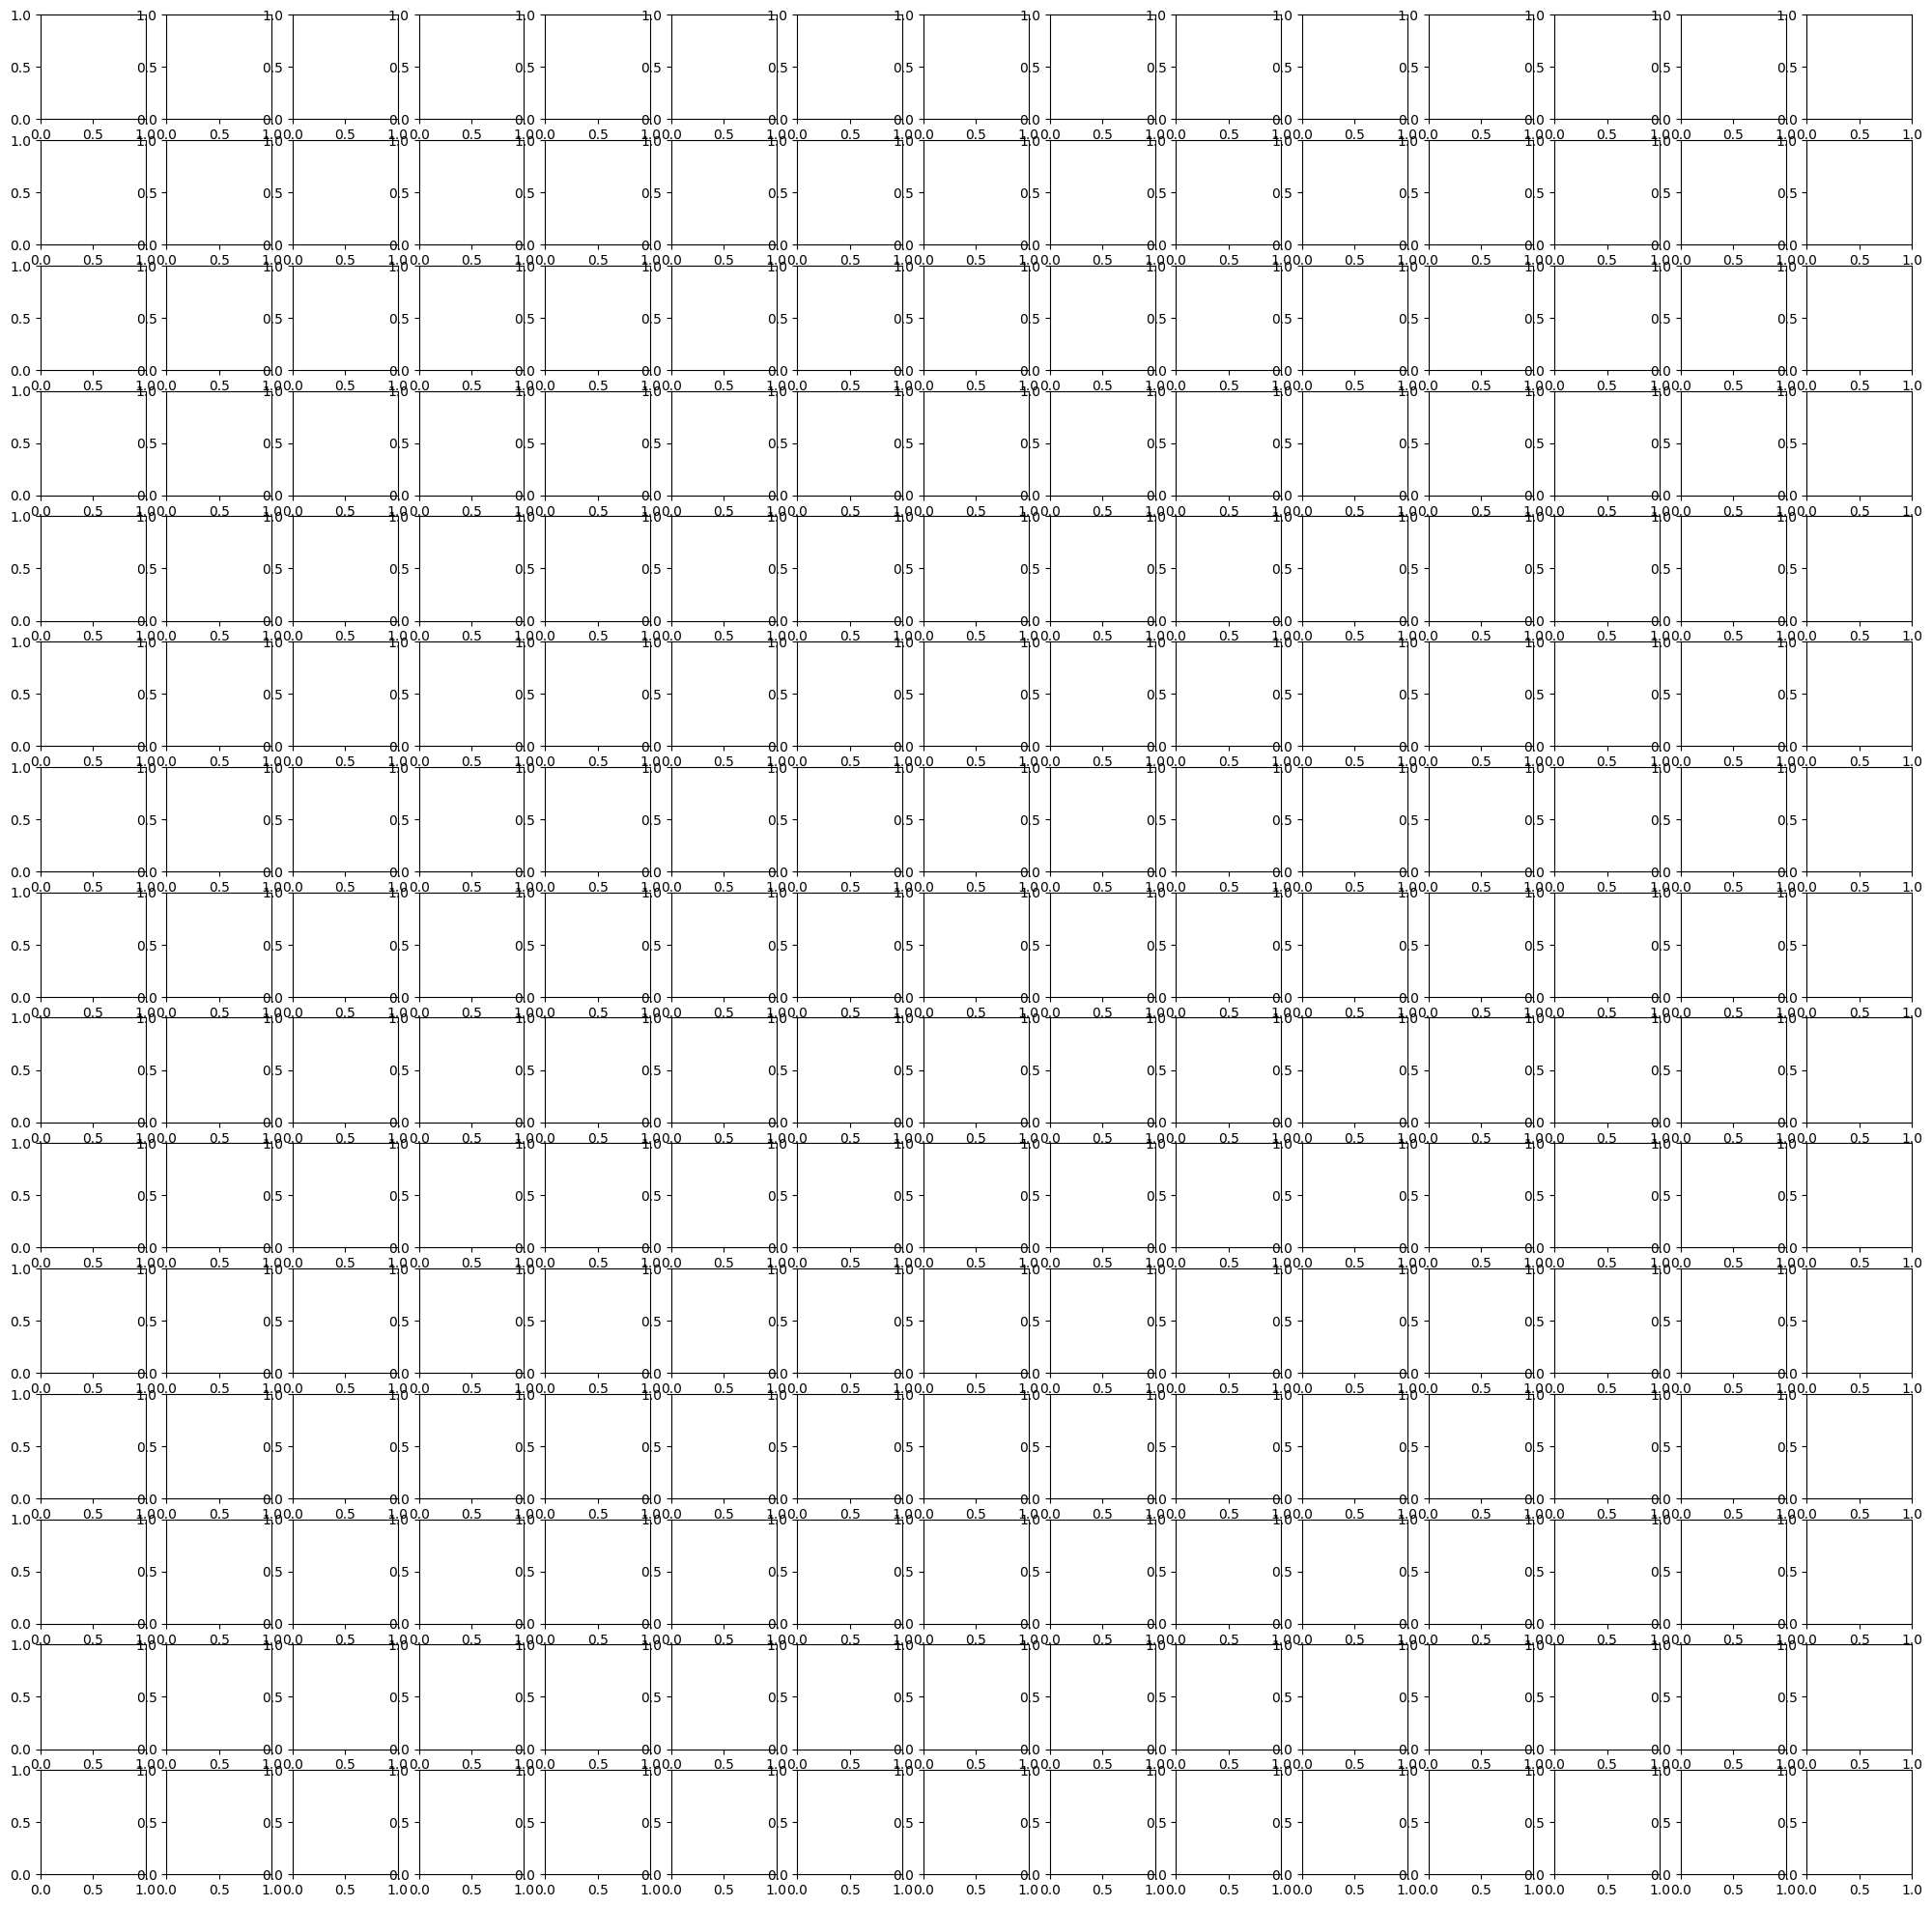

In [12]:
w_grid = 15
l_grid = 15 

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

this is the grid of imgges

In [13]:
n_training

50000

In [14]:
for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training) # pick the random number
    axes[i].imshow(X_train[index])
   

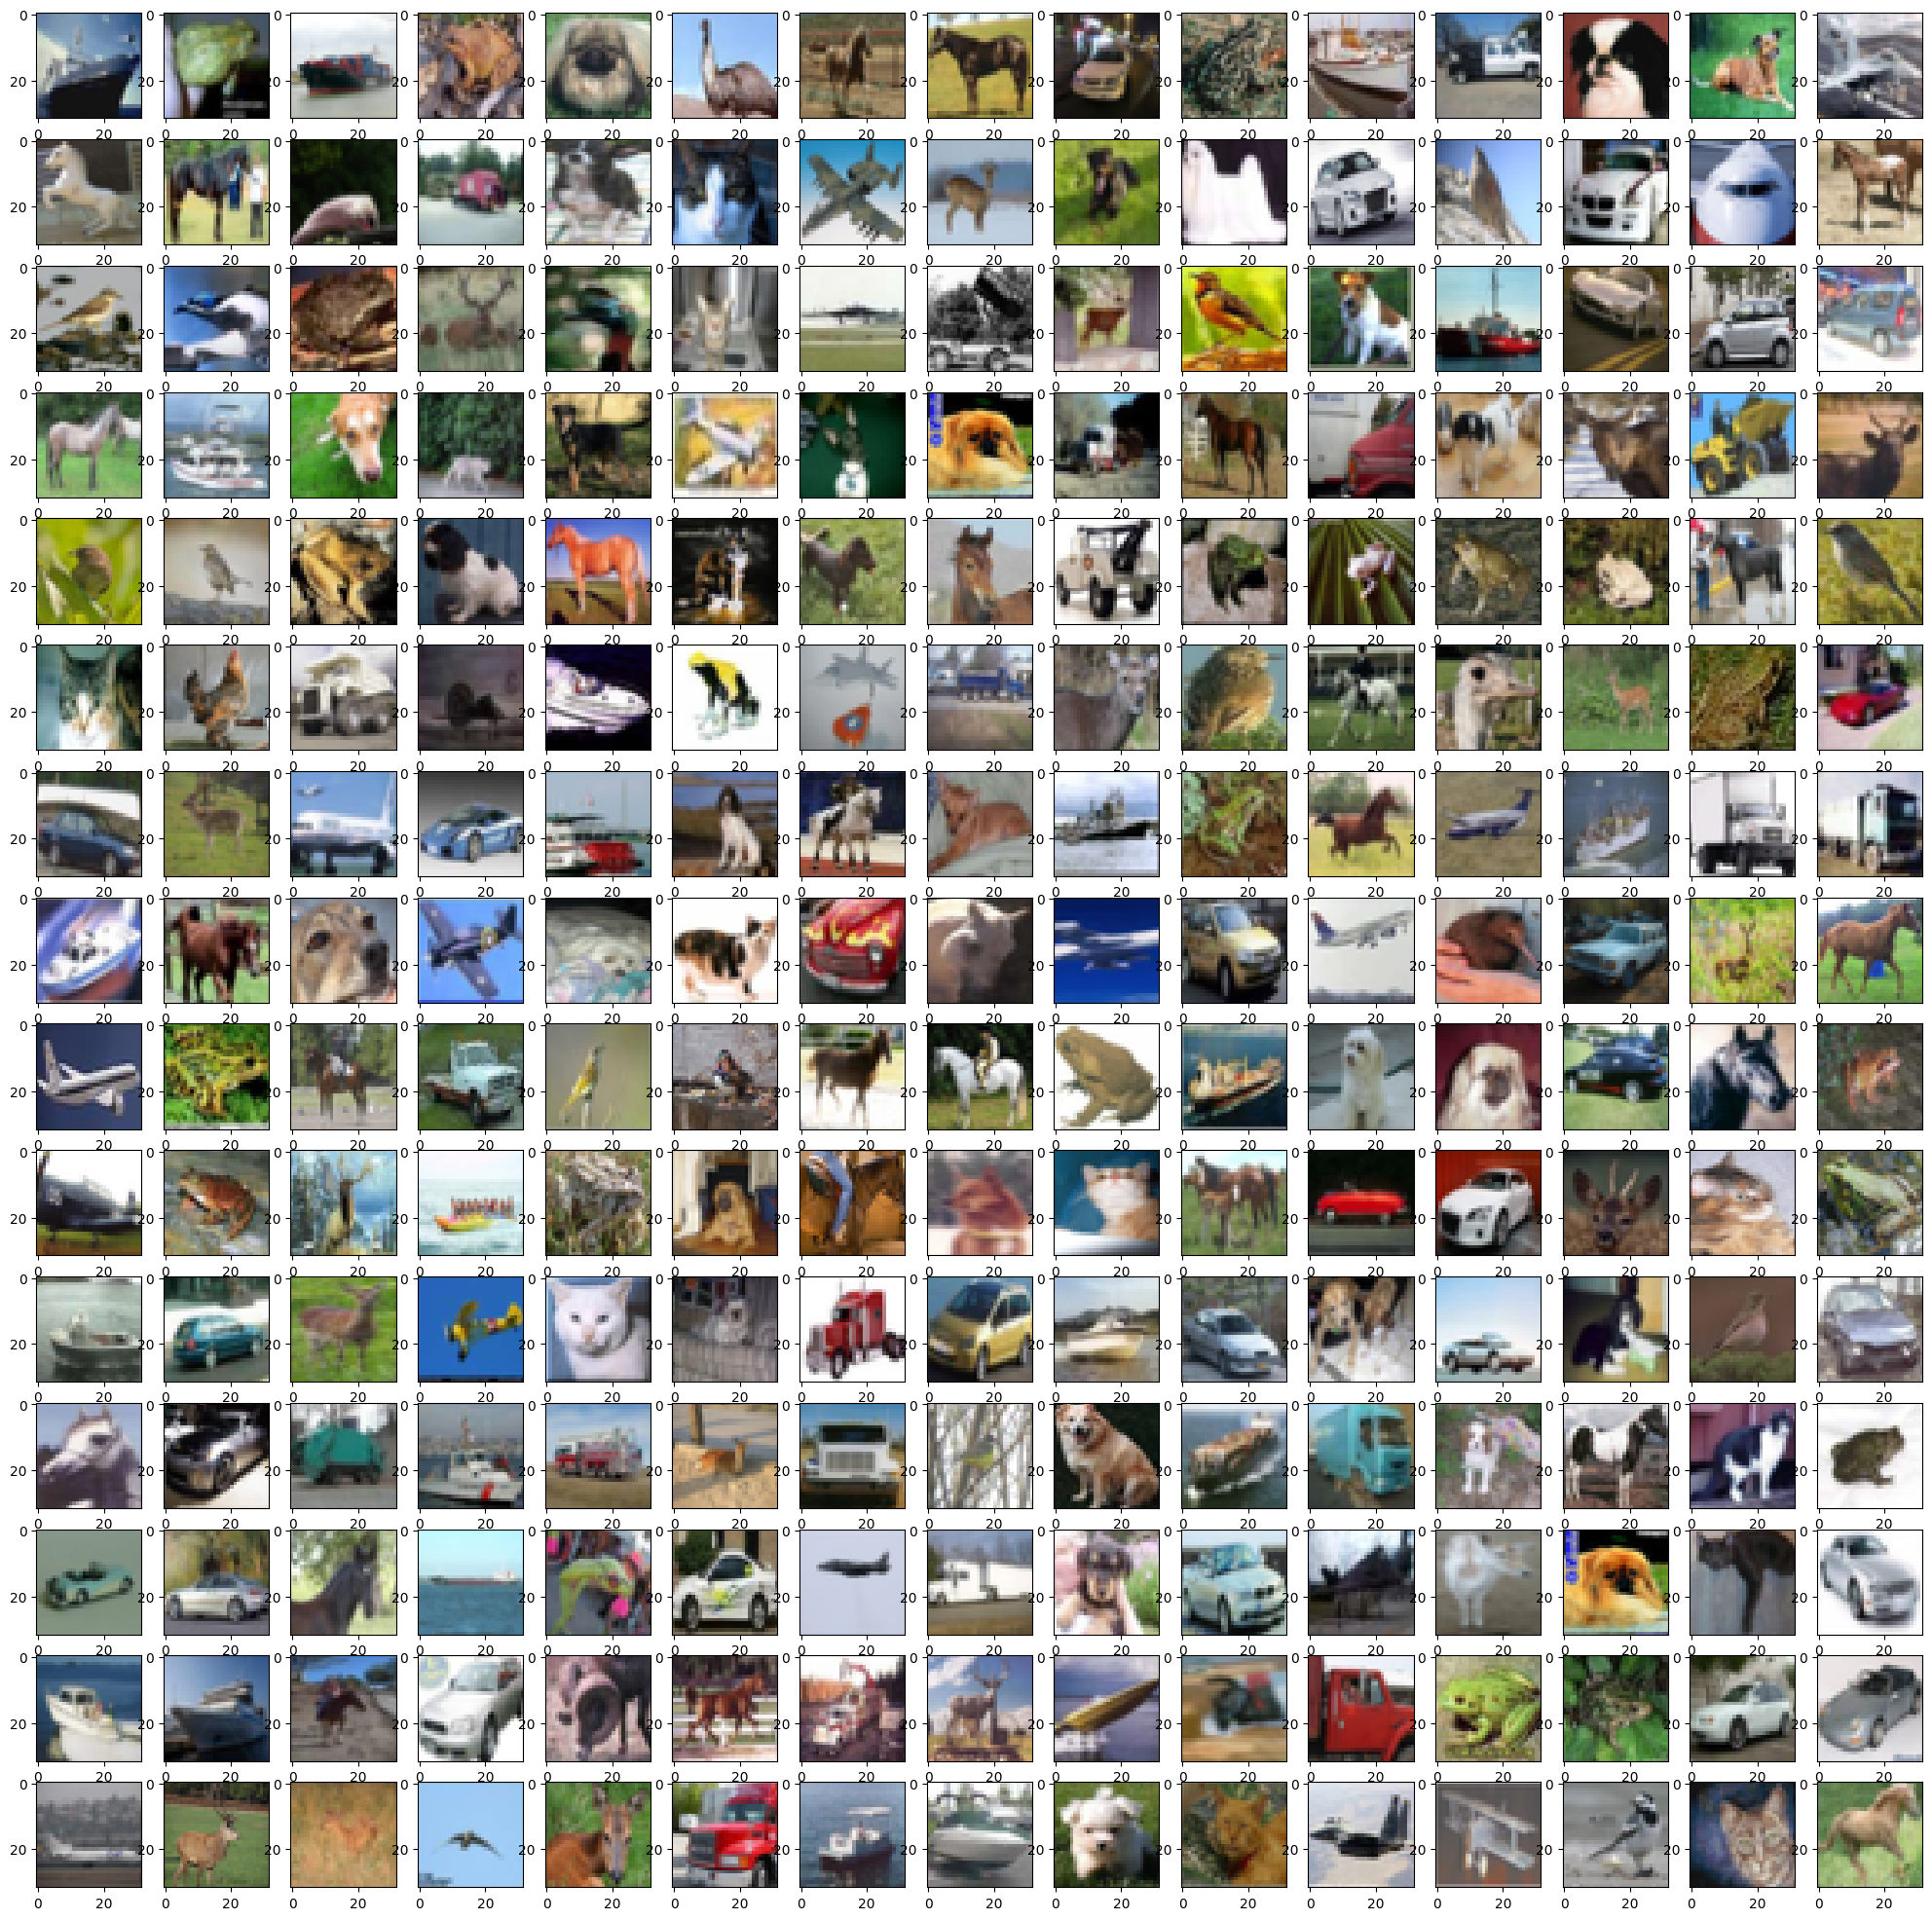

In [15]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])

C:\Users\Digvijay Mohite\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


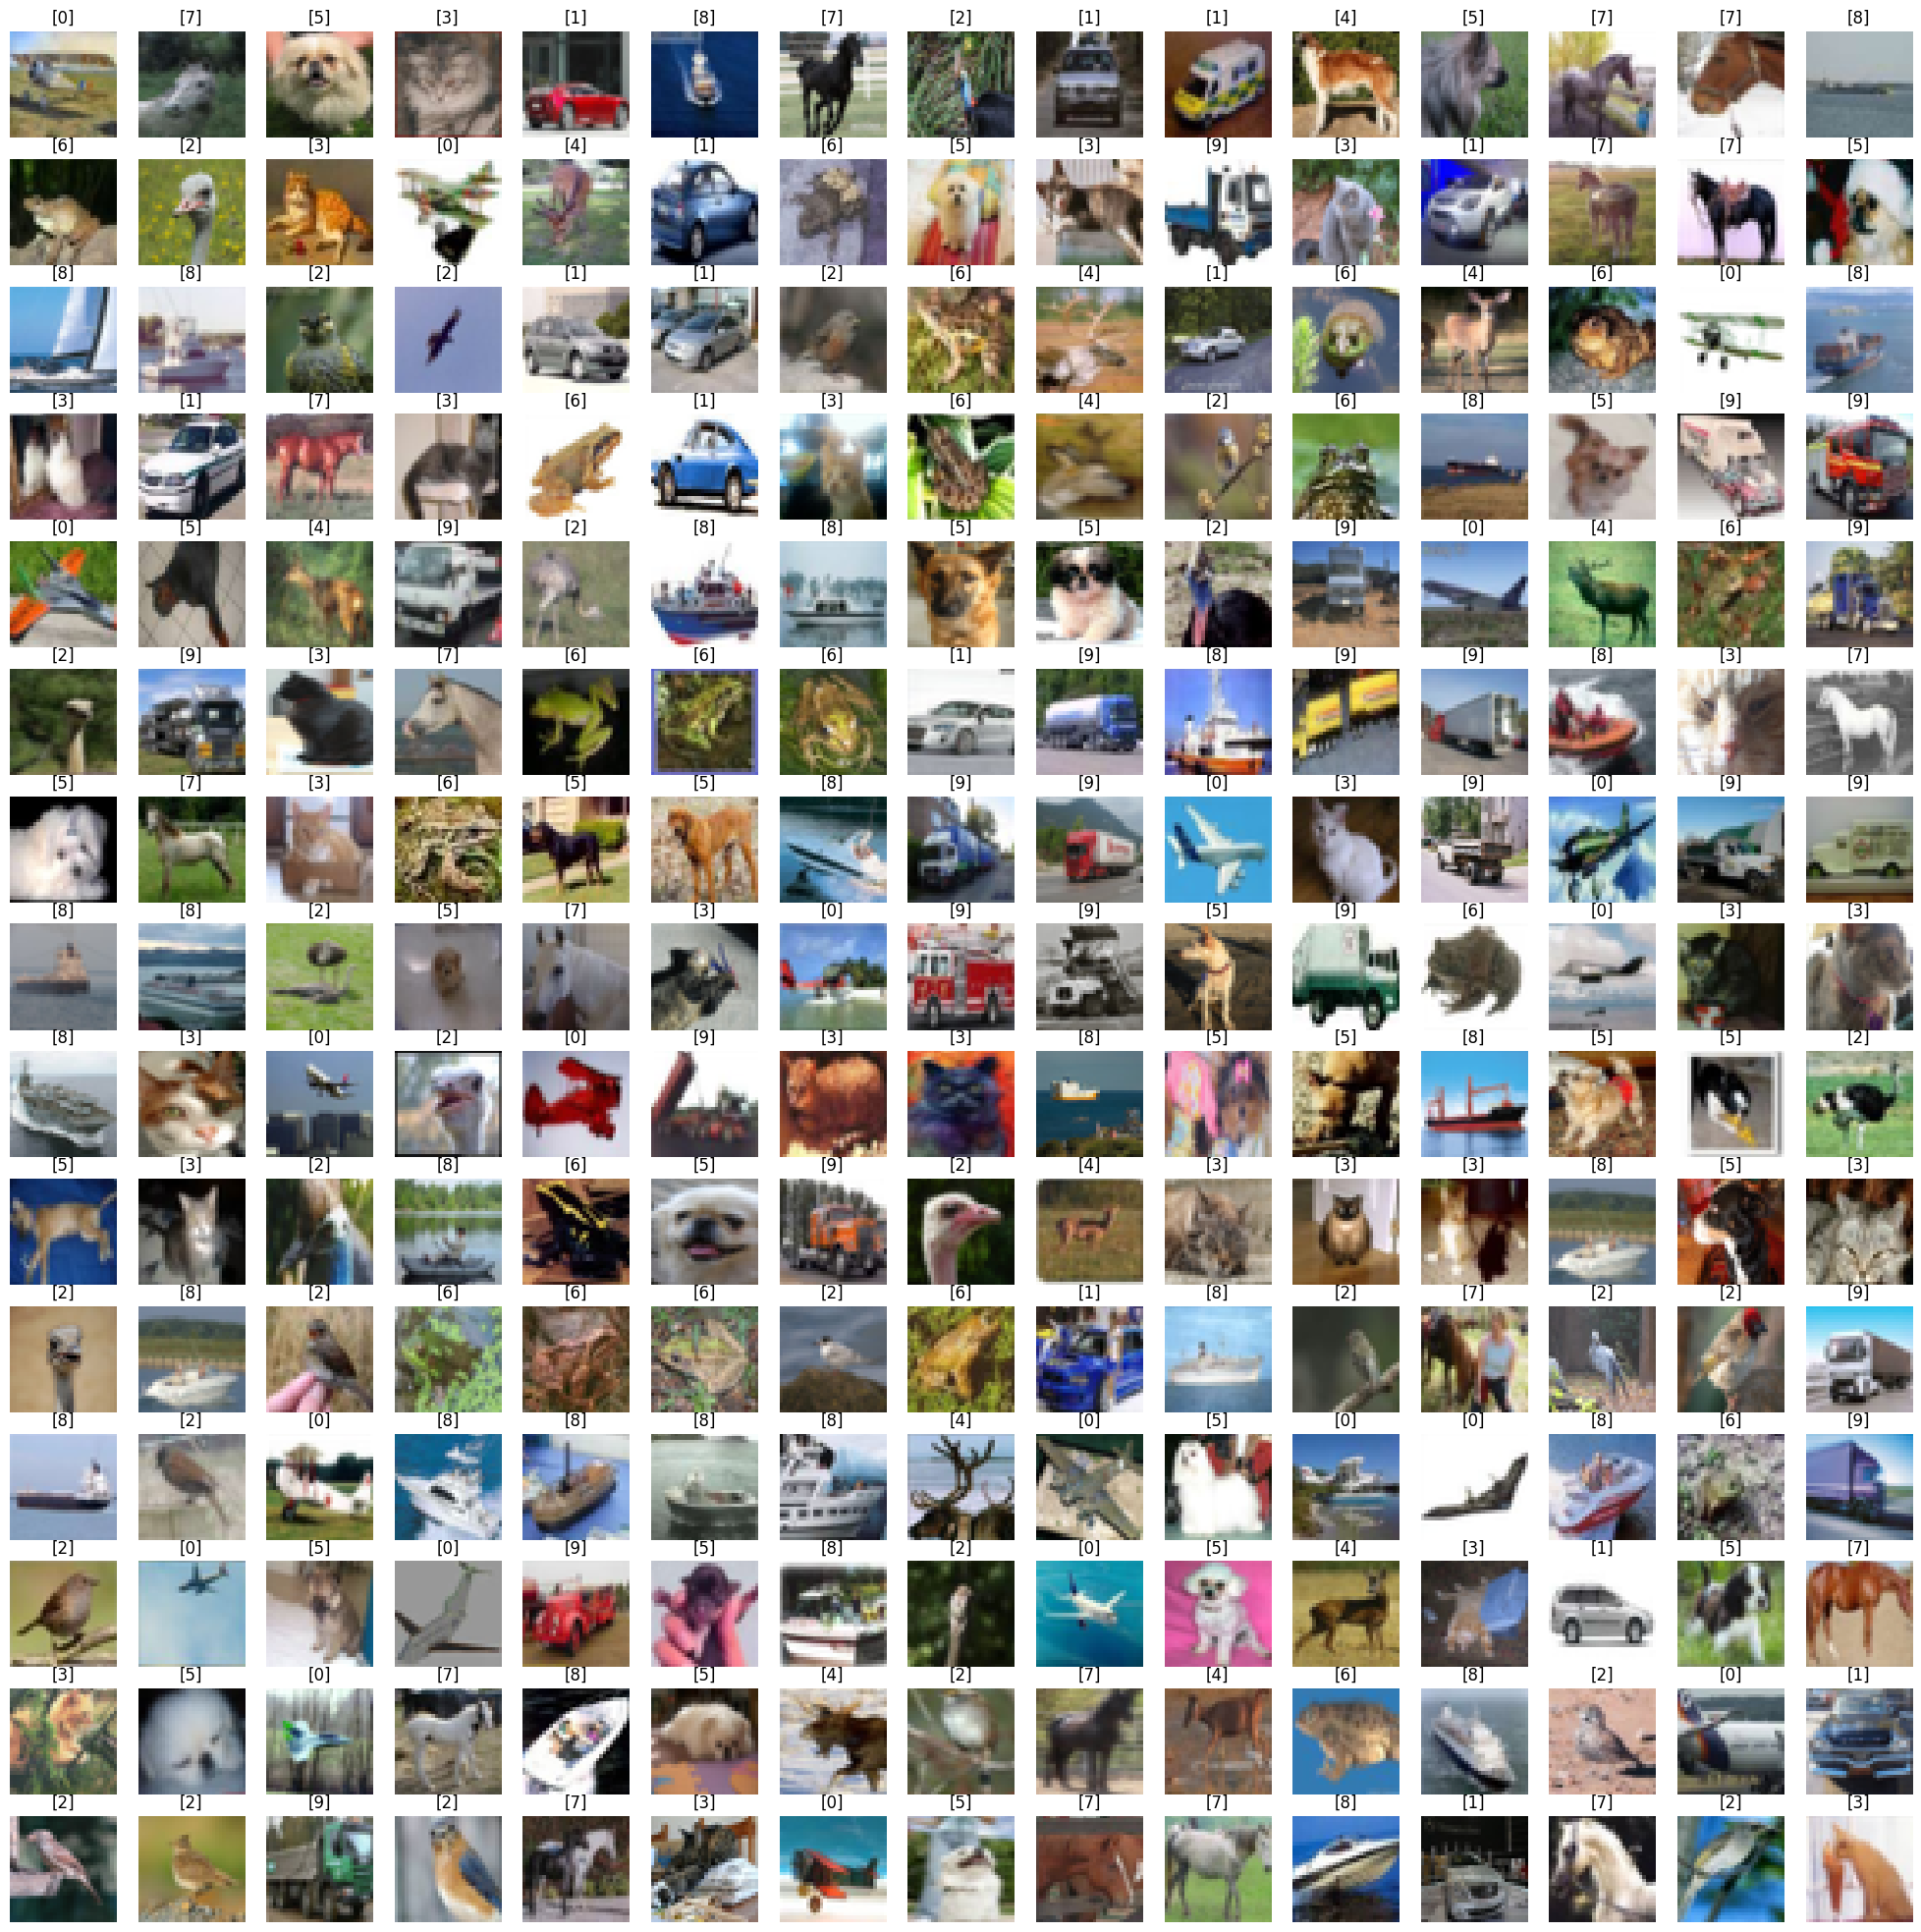

In [16]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # will set title on top of images
    axes[i].axis('off')

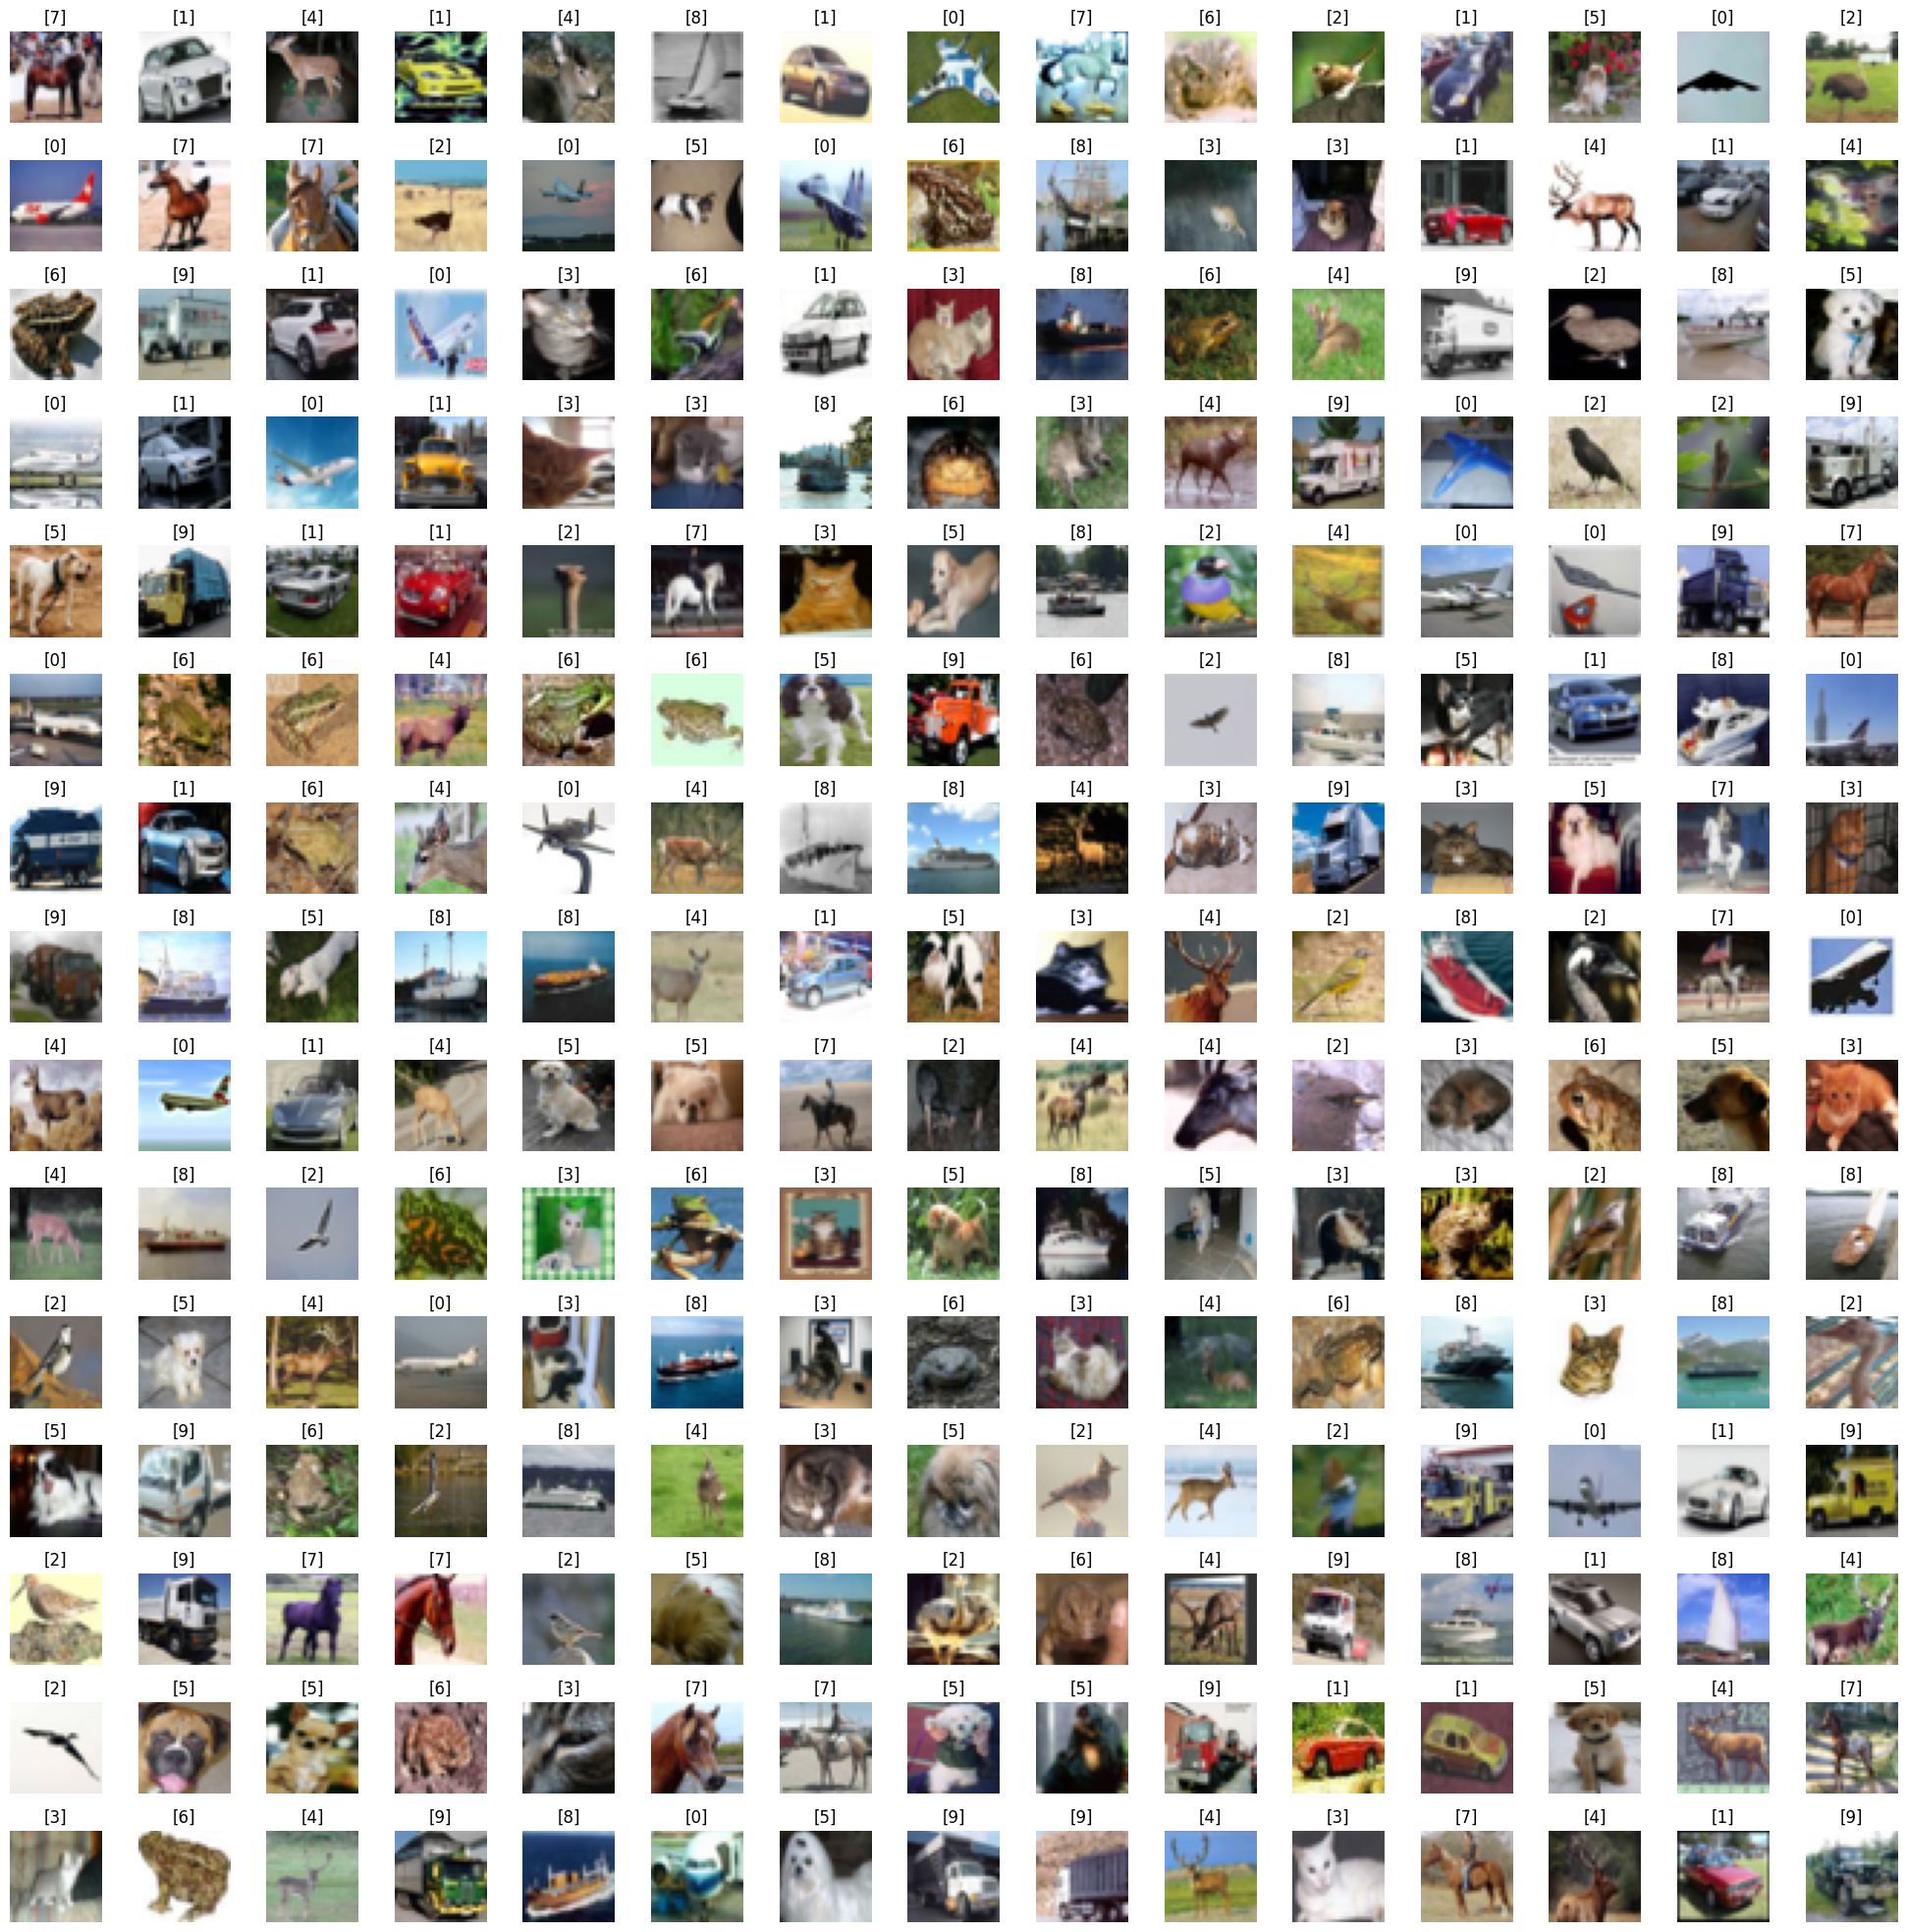

In [17]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # will set title on top of images
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4) # shift the images wit space

### STEP 3: DATA PREPARATION

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
number_cat = 10 # no .of catagories is 10

In [20]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

actualy we need values in binary format so we will convert decimal to binary for that we have keras library 

In [21]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Now we will do data normalization i.e data will be in 0 to 1 format

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [27]:
X_train.shape

(50000, 32, 32, 3)

we need only (32, 32, 3) so for that 

In [28]:
Input_shape = X_train.shape[1:]

In [29]:
Input_shape

(32, 32, 3)

### STEP 4: TRAIN THE MODEL

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2)) # downsampling from 3x3 to 2x2
cnn_model.add(Dropout(0.4)) # 40% of total neurons 


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [32]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [33]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 274s 174ms/step - loss: 1.6388 - accuracy: 0.4077
Epoch 2/2
1563/1563 [==============================] - 284s 182ms/step - loss: 1.1548 - accuracy: 0.5960


### STEP 5: EVALUATE THE MODEL

In [34]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 10s 30ms/step - loss: 1.0481 - accuracy: 0.6505
Test Accuracy: 0.6504999995231628


In [38]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=1) 
predicted_classes

313/313 [==============================] - 10s 33ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [39]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [40]:
y_test = y_test.argmax(1)

In [41]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

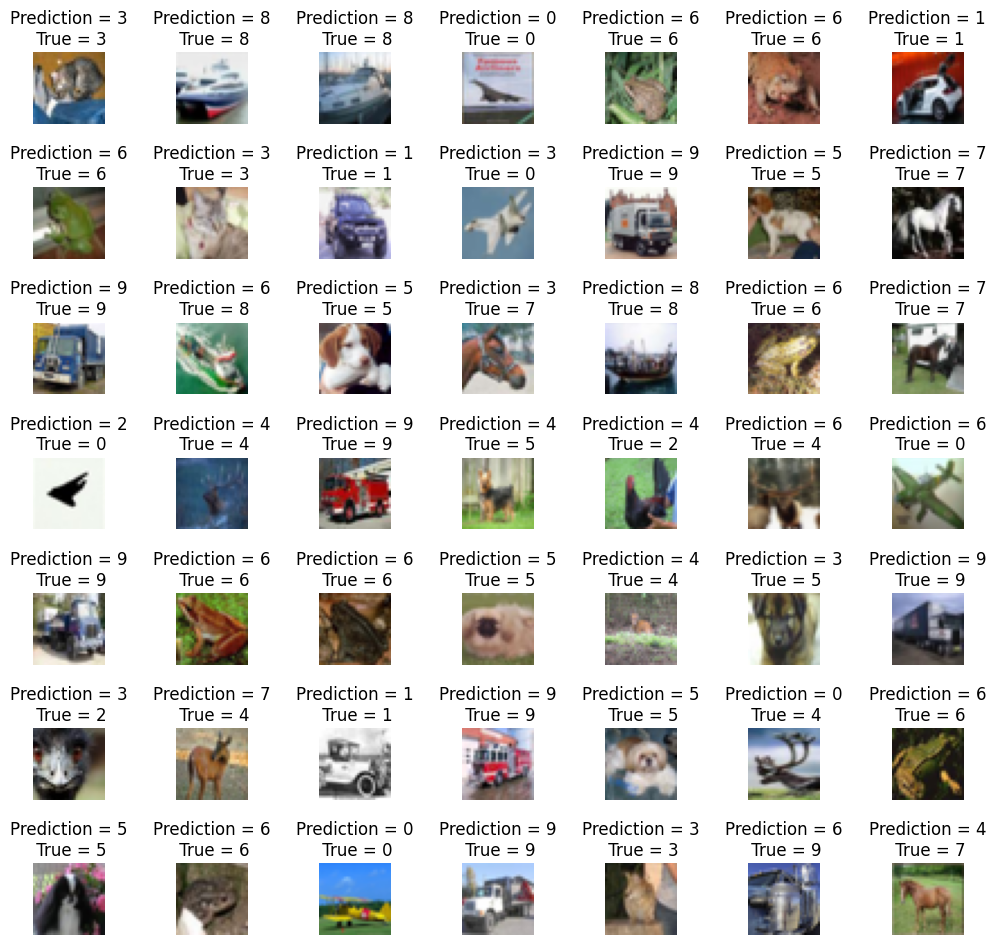

In [42]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

[[523  17 114  85  68   7  24  21  95  46]
 [  9 824   1  34  10   6  46   4  21  45]
 [ 25   2 372 112 183  88 181  25   7   5]
 [  7   6  21 527 101 170 137  22   5   4]
 [  4   2  24  68 685  23 145  41   6   2]
 [  2   1  25 195  82 579  71  41   2   2]
 [  2   0  14  59  26  16 877   2   4   0]
 [  3   3   9  59 146 101  34 637   2   6]
 [ 53  34  25  63  12   7  23   4 758  21]
 [ 11  89   5  46  20   7  60  17  22 723]]


<Axes: >

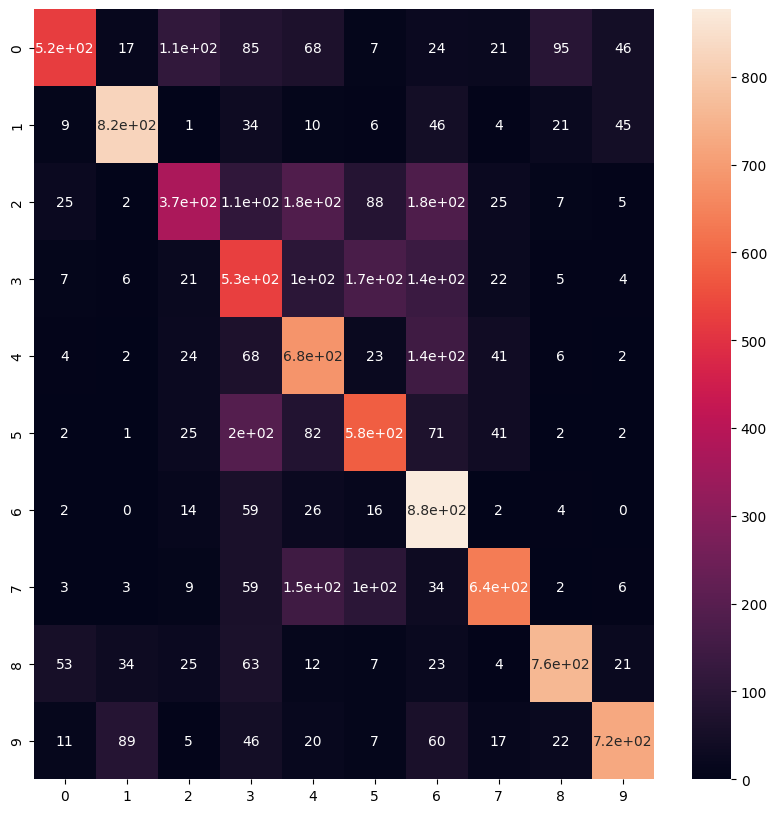

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
print(cm)
sns.heatmap(cm, annot = True)

### STEP 6: SAVING THE MODEL

In [46]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.keras')
cnn_model.save(model_path)

### STEP 7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

### STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [47]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [48]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [49]:
X_train.shape

(50000, 32, 32, 3)

In [50]:
n = 8 
X_train_sample = X_train[:n]

In [51]:
X_train_sample.shape

(8, 32, 32, 3)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

# GREAT JOB! 